# Importing required Modules and Libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Loading the IBM HR Analytics Dataset

In [226]:
#importing the red wine dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv(r'C:\Users\Sony\Desktop\HR-Analytics.csv')

checking the first five rows of the dataset in order to get general idea of features and variables.

checking the input variables and output variables.

the head() function used to view the preview of the data for given number of rows,if no value is

given then bydefault it will display first five rows.

In [227]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploring the Dataset

let's start it with checking the number of rows and columns in the given Dataset-->



Now lets check the name of all the columns this dataset have so that it is easy for us to --

--view the names of columns in easier way and make further analysis on them-

In [228]:
df.shape

(1470, 35)

This dataset contains 1470 rows and 35 columns

In [229]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In the above output we can clearly see the names of all columns.

now by observing the dataset and column names it is clear that feature "Attrition" is dependent--

--variable and all other features are independent.

For further analysis we have to check the datatypes of values of each column-->

In [230]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Checking the Missing Values in Dataset

In [231]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

that's great ,we have no null values in the given dataset,it makes our job easy...isn't it?

# Statistical Summary of the Dataset

now lets see the summary of the statistics of the dataset pertaining to the dataset columns,

like mean,median,mode,standard deviation and IQR values.

as the whole dataset is numeric so no need to worry for the dropping of any column as below function-

--only works on numerical data

In [232]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning

In [233]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [234]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

In [235]:
# Half the rows in JobSatisfaction seem to be strings. 
# It's the same for the other columns. Let's cast them to floats.

cols = ['JobSatisfaction', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike']
df[cols] = df[cols].applymap(np.float64)

In [236]:
# I know from looking in Excel that certain fields are useless so lets get rid of them
df = df.drop(['EmployeeCount', 'Over18', "StandardHours", "EmployeeNumber"], 1)

In [237]:
# Lets try find some more funky rows
for col in df:
    print(col)
    print(df[col].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [238]:
# Check for missings
print(np.count_nonzero(df.isnull().values))
print(df.isnull().any())

# Check for duplicates
print(df[df.duplicated(keep=False)].shape)

# Strip whitespaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Check for conflicting types
df.dtypes

0
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLa

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [239]:
# Hate to throw away data but it's only 353 values out of over 23 thousand
df.dropna(axis=0, inplace=True)

# Get rid of all the duplicates
df.drop_duplicates(inplace=True)

# Lets see what it looks like now

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


ITS PRETTY MUCH ALL CLEAN

# Finding Correlations

Before I move any further I'd like to check over the data broadly to see if anything in the data 

catches my eye. Plotting a correlation heatmap, which is a measure of the strength of a relationship

between two variables, can tell me quite a lot about the data in a short amount of time.

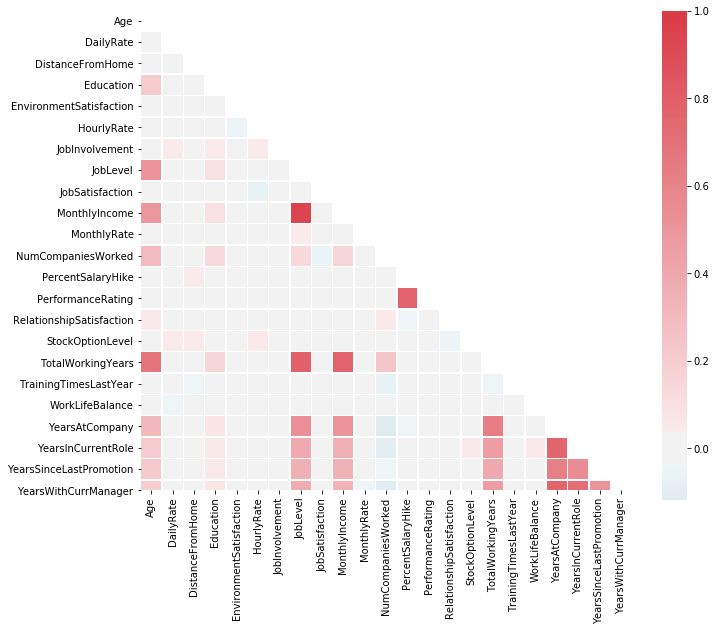

In [240]:
# Subset the dataset into all the numerical values
numeric_df = df.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric_df._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0,
                      vmax = 1, square=True, linewidths=.5, ax=ax)
plt.savefig('corr-heat.png')
plt.show()

# Correlations Description

Most of the values appear to be weakly correlated with each other.

But there's lots of insights here to be had.

Takeaways

1.Perhaps unsurprisingly TotalWorkingYears is highly correlated to Job Level (i.e., the longer you work
                                                                
the higher job level you achieve)

2.HourlyRate, DailyRate, and MonthlyRate are completely uncorrelated with each other which makes no

sense.

3.As MonthlyIncome is highly correlated to Job Level i'm inclined to keep using that over any of 
 
these.

4.Age is correlated JobLevel and Education (i.e., the older you are the more educated and successful

you are)

5.Work life Balance correlates to pretty much none of the numeric values

6.Number of companies you've worked at is weakly correlated with the time you've spent at the

company (might indicate you're likely the leave)

7.If your performance rating is high you'll get a bigger raise!

# Data Exploration

Now lets look at some numbers:

In [241]:
# Lets drop the rates from the numerics dataframe
numeric_df = numeric_df.drop(["HourlyRate","DailyRate", "MonthlyRate"], 1)

In [242]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Some nice summary statistics to be had here:

Mean age of IBM employees is 37

Most people get a promotion in 2-5 years

Average time employed at IBM is 7 years

No one has a performance rating under 3

Lots of training times at IBM: seems like most people get training 2-3 times a year

So everyone is performing well, getting training, and is staying at their jobs for quite a while.

Who does leave then?

# Who Leaves IBM? (Attrition Analysis) 

 There are lots of ways to approach this, I could spend a long time digging into this thoroughly, 

looking at the impact of travel, the department you're in, gender, income, & work life balance.

Given this is already rather long I'm only going to focus on age, the time spent at IBM,

and whether you worked overtime or not.

No     1233
Yes     237
Name: Attrition, dtype: int64


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

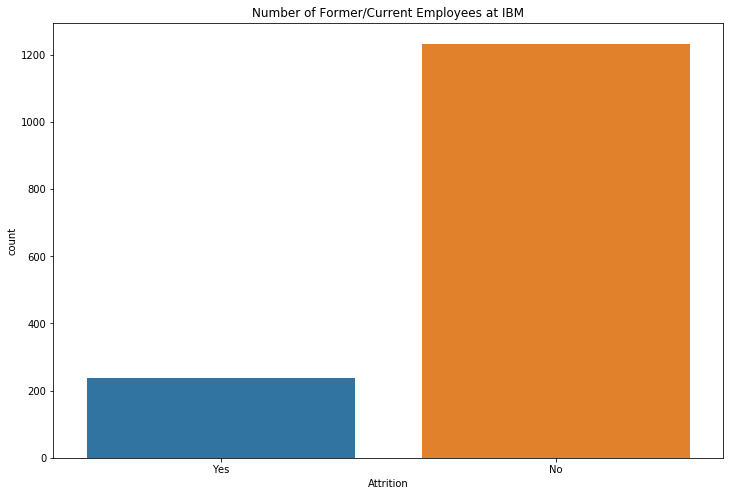

In [243]:
print(df.Attrition.value_counts())

# Easier to join all leaver together for my analyses considering there are very few terminations
df['Attrition'] = df['Attrition'].replace("Termination", "Voluntary Resignation")
df['Attrition'] = df['Attrition'].replace("Voluntary Resignation", "Former Employees")
df['Attrition'] = df['Attrition'].replace("Current employee", "Current Employees")

plt.figure(figsize=(12,8))
plt.title('Number of Former/Current Employees at IBM')
sns.countplot(x="Attrition", data=df)
df['Attrition'].value_counts()/df['Attrition'].count()*100

It appears that barely anyone has left! Considering we have people who have worked at

IBM for 40 years I would expect there to be more former than current employees.

Perhaps IBM has suddenly had a rapid expansion.

Lets see whether age is a factor.


In [244]:
temp3 = pd.crosstab([df.Department,df.Gender,df.MaritalStatus,df.WorkLifeBalance], df['Attrition'])
print(temp3)
income_pivot = df.pivot_table(values=["MonthlyIncome"], index=["Gender","MaritalStatus","WorkLifeBalance"], aggfunc=[np.mean, np.std])
print(income_pivot)

Attrition                                             No  Yes
Department      Gender MaritalStatus WorkLifeBalance         
Human Resources Female Divorced      2                 0    2
                                     3                 1    1
                       Married       1                 1    0
                                     3                 6    3
                                     4                 1    0
...                                                   ..  ...
Sales           Male   Married       4                14    3
                       Single        1                 2    0
                                     2                11   10
                                     3                44   15
                                     4                 4    2

[65 rows x 2 columns]
                                              mean           std
                                     MonthlyIncome MonthlyIncome
Gender MaritalStatus WorkLifeBalance     

# Data Visualization 

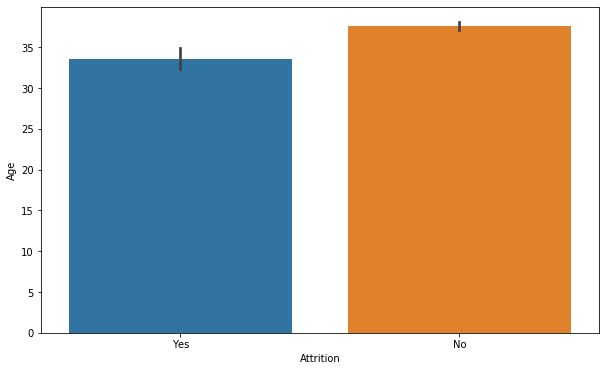

In [245]:
'''Check visualization between Age and Attrition'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Attrition', y = 'Age', data = df)

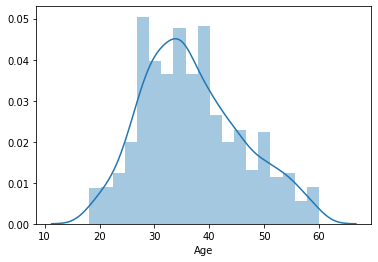

In [246]:
sns.distplot(df['Age'])

Looks like most people leave IBM in their early 30's

. Maybe IBM has trouble retaining young employees? How long do employees tend to stick

around at IBM for? When do the majority of employees leave? In their first year perhaps?

 Plot the distribution of Years at Company by Attrition

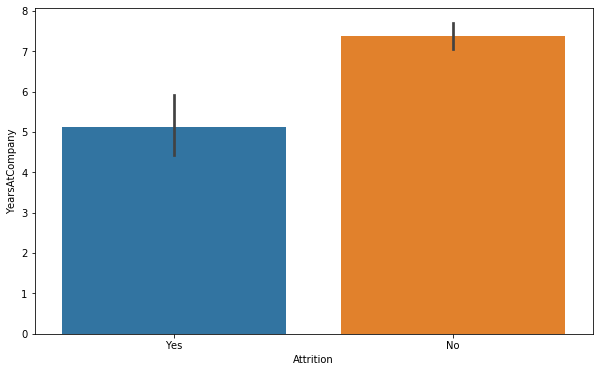

In [247]:
'''Check visualization between year at company and Attrition'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Attrition', y = 'YearsAtCompany', data = df)

Two takeaways:

The highest attrition rate occurs in the first year of the job. Over 20% of all employees who left did so in their first year.
The vast majority of the workforce has been at IBM for under 10 years. Perhaps only the best and brightest get the privledge to continue on after 10 years.
I suspect if you're over worked you should be more likely to leave. Lets see if that's the case.

Text(0.5, 0.98, 'Attrition Counts by whether an Employee worked Over Time')

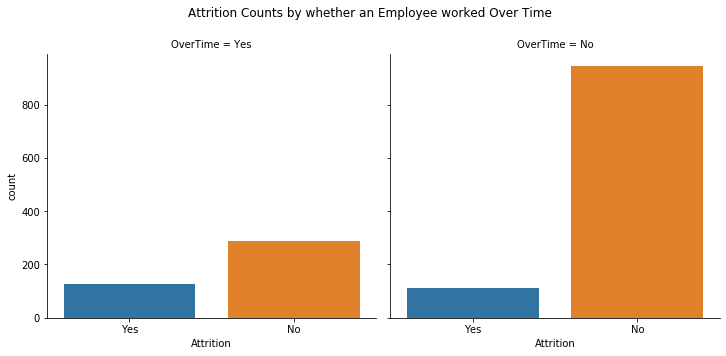

In [248]:
# Plot out the counts of OverTime
from scipy import stats
sns.factorplot("Attrition", col="OverTime", data=df, kind="count", col_wrap=2, size=5)
plt.subplots_adjust(top=.85)
plt.suptitle('Attrition Counts by whether an Employee worked Over Time')



By eyeballing this plot I can see the employees who work over time leave at a higher rate than those who do not.  I can confidently say over time is related to attrition.

Given this assoication and that of age: perhaps over worked employees are more likely to be under 30?

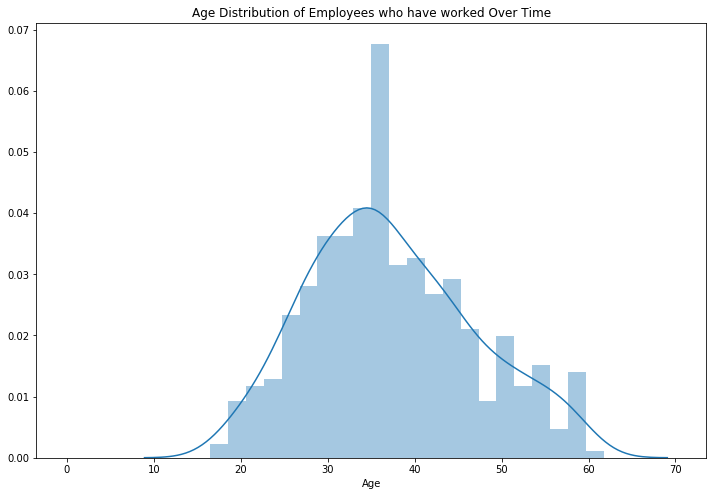

In [249]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Employees who have worked Over Time')
#sns.distplot(hr.YearsAtCompany, bins = np.linspace(0,40,40))
sns.distplot(df.Age[df.OverTime == 'Yes'], bins = np.linspace(0,70,35))

It turns out IBM doesn't discriminate on who works overtime. It appears to be distributed equally throughout all ages. I feel sorry for the 60 year olds putting in the hard yards.

Now let's look at the hard hitting question:



Gender Equality at TechCo

60.0

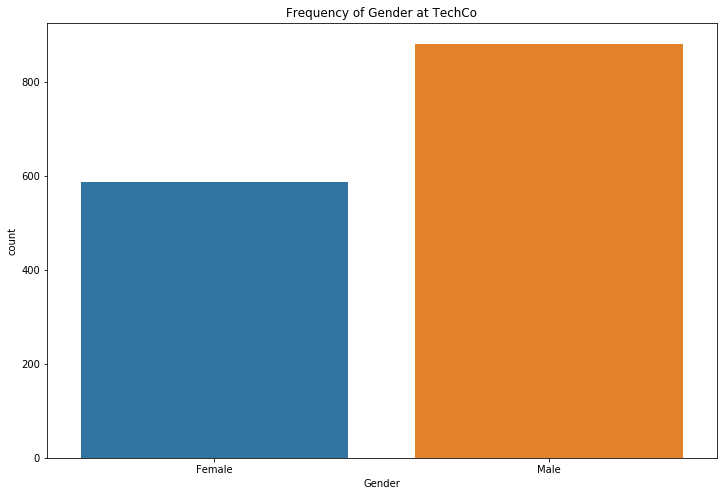

In [250]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gender", data=df)
# Proportion of males
plt.title('Frequency of Gender at TechCo')
df['Gender'].value_counts().Male/df['Gender'].count()*100

Clearly there's a gender imbalance (60% Male/40% Female) at IBM. Perhaps there's a gender imbalance in attrition too?

   Gender Attrition  percentage
0  Female        No   85.204082
2    Male        No   82.993197
1  Female       Yes   14.795918
3    Male       Yes   17.006803


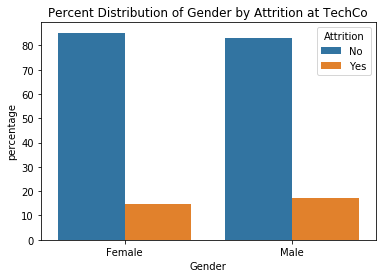

In [251]:
# First lets cast these string columns into categories
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in cats:
    df[col] = df[col].astype('category')

group_df = df.groupby(cats)


attrition_counts = (df.groupby(['Gender'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Attrition'))
plt.title('Percent Distribution of Gender by Attrition at TechCo')
sns.barplot(x="Gender", y="percentage", hue="Attrition", data=attrition_counts)

# It's the same, looks suss
print(attrition_counts)

It's rather odd that the proportion of attrition rates is almost exactly the same for men and women. Let's see if women travel more?

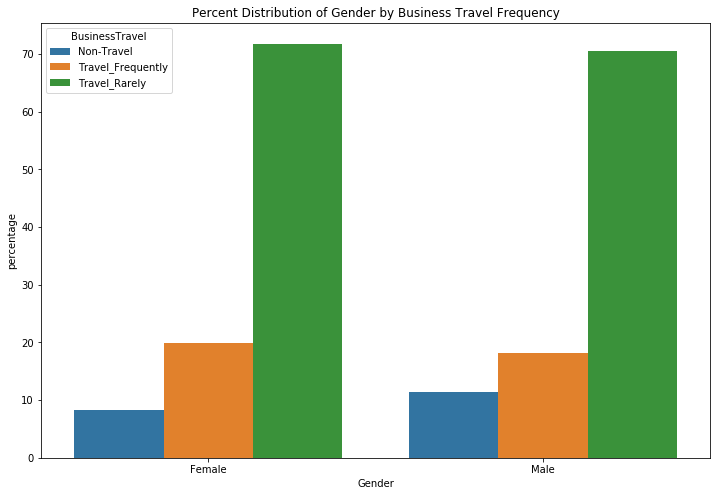

In [252]:
# Plot the distribution of females in this workplace
plt.figure(figsize=(12,8))
#sns.countplot(x="Gender", hue="Attrition", data=hr[hr['Attrition'].isin(['Voluntary Resignation', 'Termination'])])

attrition_counts = (df.groupby(['Gender'])['BusinessTravel']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('BusinessTravel'))
plt.title('Percent Distribution of Gender by Business Travel Frequency')
sns.barplot(x="Gender", y="percentage", hue="BusinessTravel", data=attrition_counts) 

#sns.countplot(x="Gender", data=hr, palette="Greens_d")

Same again. What about across departments?

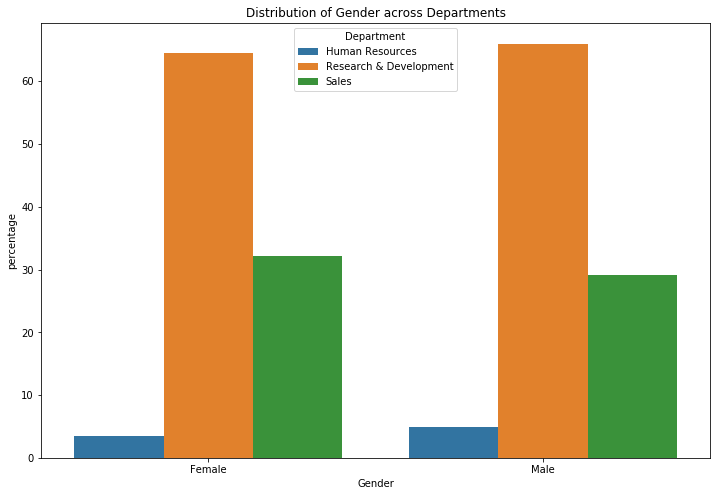

In [253]:
# Plot the distribution of females in this workplace
plt.figure(figsize=(12,8))
#sns.countplot(x="Gender", hue="Attrition", data=hr[hr['Attrition'].isin(['Voluntary Resignation', 'Termination'])])

attrition_counts = (df.groupby(['Gender'])['Department']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Department'))
plt.title('Distribution of Gender across Departments')
sns.barplot(x="Gender", y="percentage", hue="Department", data=attrition_counts)

Same thing! Freaky if it was real. It's likely gender was assigned randomly over the whole dataset.

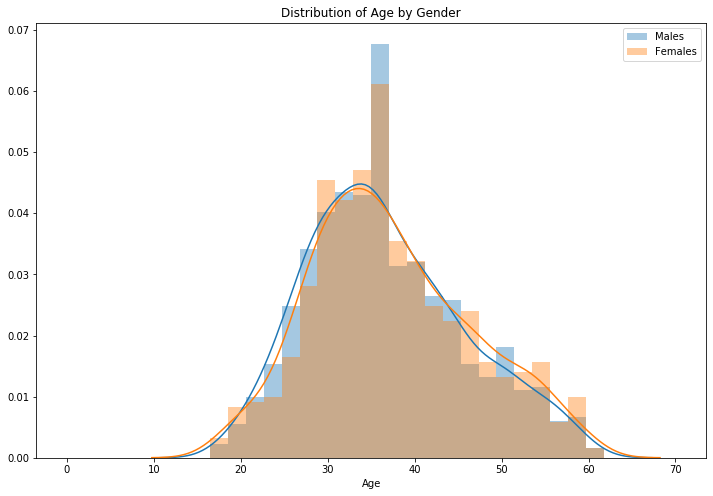

In [254]:
# Plot the distribution of age by gender
plt.figure(figsize=(12,8))
sns.distplot(df.Age[df.Gender == 'Male'], bins = np.linspace(0,70,35))
sns.distplot(df.Age[df.Gender == 'Female'], bins = np.linspace(0,70,35))
plt.title('Distribution of Age by Gender')
plt.legend(['Males','Females'])

The distribution of ages at this company is mostly equal, but 36-38 year old middle-aged males

(of which there are roughly 670) outnumber the rest of the age brackets.

Do males earn more at IBM than females?

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)


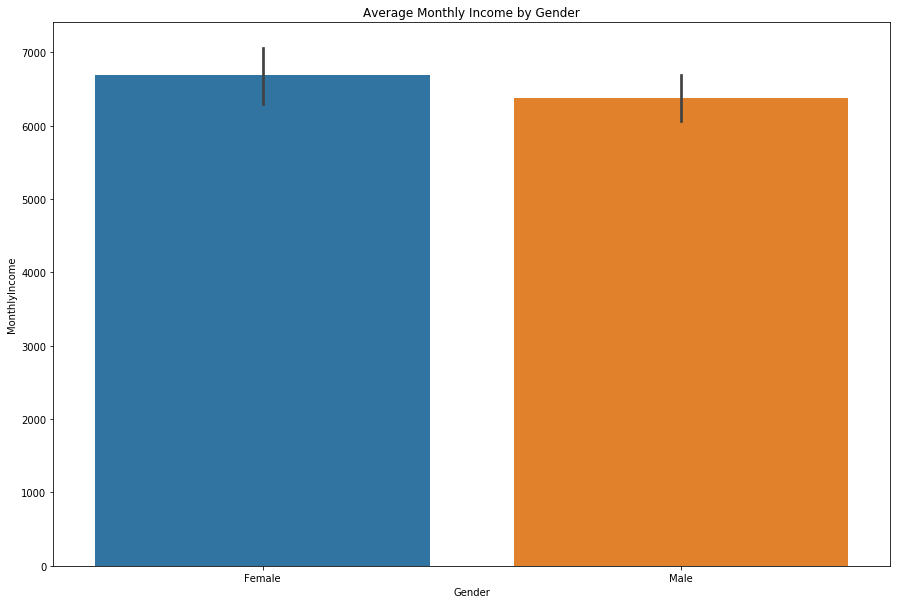

In [255]:
# It appears women are under-represented at this company. Let's see if they get paid less.
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender')
sns.barplot(x="Gender", y="MonthlyIncome", data=df)

# T-Test
cat1 = df[df['Gender']=='Male']
cat2 = df[df['Gender']=='Female']

print(stats.ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome']))

Females have a slightly higher monthly income than males. A t-test confirms that this is the case.

Let's look at the distribution

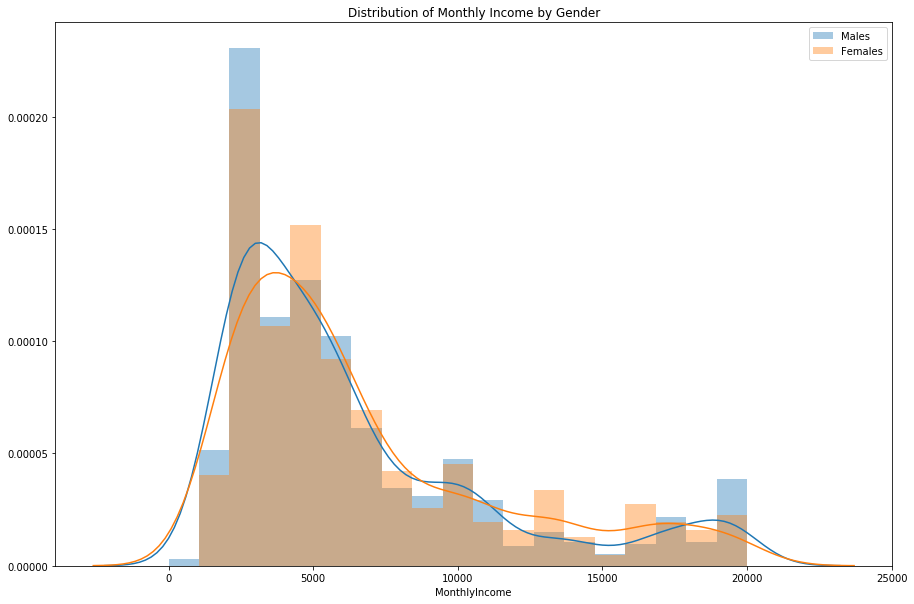

In [256]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Monthly Income by Gender')
sns.distplot(df.MonthlyIncome[df.Gender == 'Male'], bins = np.linspace(0,20000,20))
sns.distplot(df.MonthlyIncome[df.Gender == 'Female'], bins = np.linspace(0,20000,20))
plt.legend(['Males','Females'])

The most common monthly wage comes in the 2-3K mark. There are noticeably more males in this wage bracket than females.

Does martial status have an effect? Married people might have a more stable personal life which leads to better performance in their jobs.

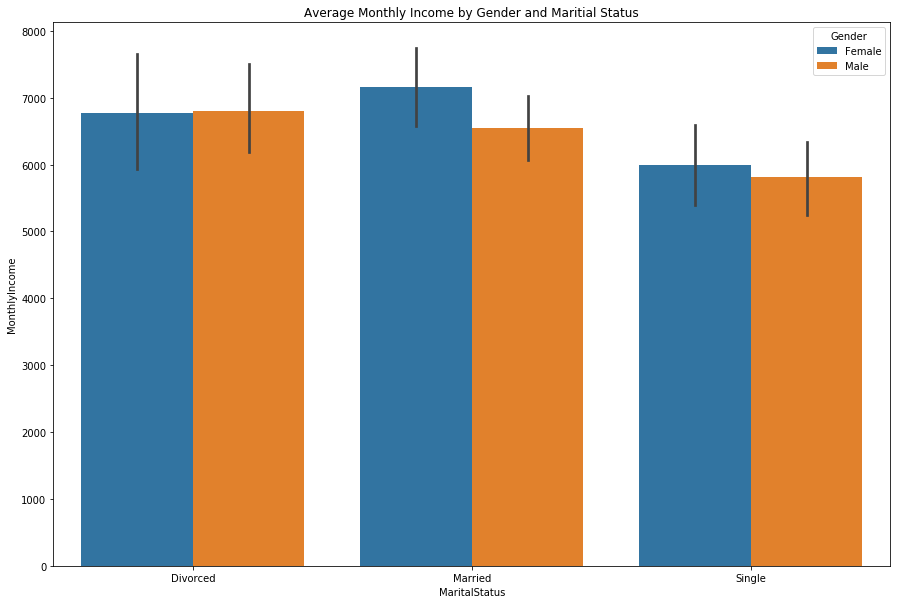

In [257]:
# What about all the single ladies?
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Gender", data=df)

It appears that while there are less females in the workplace, they earn more than the males, but leave at the same rates. Married people have clear advantage over single people but it might be correlated simply to age.

Let's do a rough check on the age distributions to be sure.

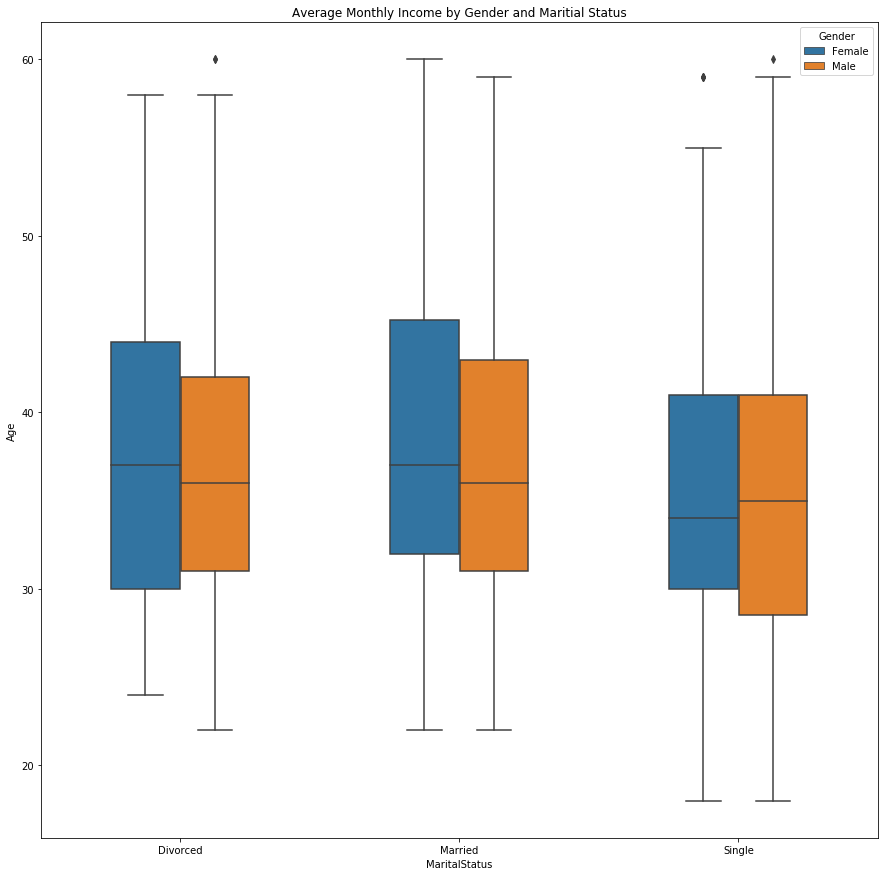

In [258]:
# Age by Gender and Martial Status 
plt.figure(figsize=(15,15))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.boxplot(x="MaritalStatus", y="Age", hue="Gender", data=df, width=.5)

There's no real difference in the distribution of age over these categories. Lets split up the entire dataset based on age brackets.

                      Age   DailyRate  DistanceFromHome  Education  \
Age                                                                  
(17.999, 25.0]  22.406504  773.016260          9.268293   2.024390   
(25.0, 35.0]    30.988449  802.376238          9.363036   2.922442   
(35.0, 50.0]    41.697324  809.897993          9.080268   3.020067   
(50.0, 70.0]    54.601399  797.300699          8.874126   3.188811   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Age                                                                             
(17.999, 25.0]                 2.682927   65.512195        2.804878  1.186992   
(25.0, 35.0]                   2.754125   65.316832        2.681518  1.678218   
(35.0, 50.0]                   2.685619   66.724080        2.757525  2.406355   
(50.0, 70.0]                   2.769231   65.167832        2.755245  3.020979   

                JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
Age               

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age Bracket
Age,,,,,,,,,,,,,,,,,,,,,
"(17.999, 25.0]",22.406504,773.016260,9.268293,2.024390,2.682927,65.512195,2.804878,1.186992,2.731707,2972.886179,...,2.699187,0.585366,3.130081,2.910569,2.845528,2.479675,1.569106,0.731707,1.495935,18-25
"(25.0, 35.0]",30.988449,802.376238,9.363036,2.922442,2.754125,65.316832,2.681518,1.678218,2.739274,4895.633663,...,2.702970,0.787129,7.648515,2.803630,2.744224,5.986799,4.052805,1.750825,3.905941,26-35
"(35.0, 50.0]",41.697324,809.897993,9.080268,3.020067,2.685619,66.724080,2.757525,2.406355,2.709030,7884.083612,...,2.687291,0.854515,14.197324,2.762542,2.792642,8.322742,4.735786,2.673913,4.725753,36-50
"(50.0, 70.0]",54.601399,797.300699,8.874126,3.188811,2.769231,65.167832,2.755245,3.020979,2.762238,10574.881119,...,2.867133,0.748252,21.475524,2.839161,2.629371,9.734266,5.146853,3.258741,4.783217,51-70


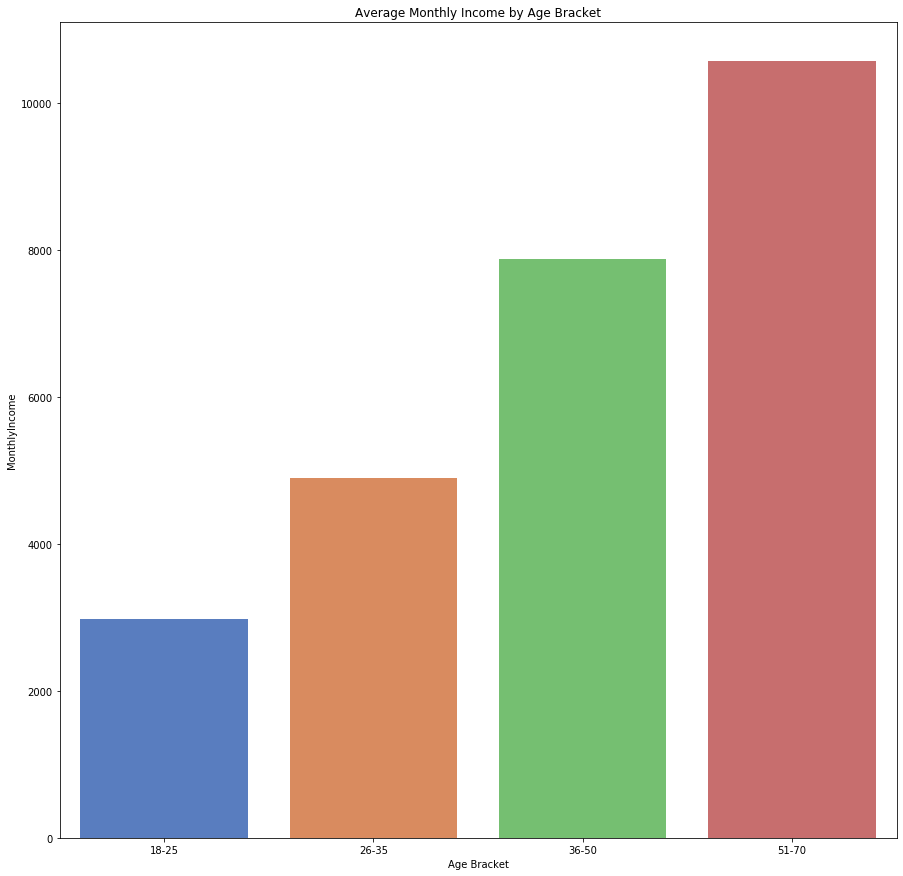

In [259]:
# Trying to get a binned distribution in of Age by MonthlyIncome in Seaborn
plt.figure(figsize=(15,15))
bins=[18, 25, 35, 50, 70]
out = df.groupby(pd.cut(df['Age'], bins=bins, include_lowest=True)).aggregate(np.mean)
print(out.head())
#out[['Age']] = out[['Age']].applymap(str)
out['Age Bracket'] = ['18-25', '26-35', '36-50', '51-70']

# Fixed X-axis labels currently looking awful!
plt.title('Average Monthly Income by Age Bracket')
sns.barplot('Age Bracket', 'MonthlyIncome', data=out, palette="muted")
out.head()

We can see that wage seems to increase linearly as you move through the age brackets. This could be correlated to how long you've been working at IBM

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Years at Company Bracket
YearsAtCompany,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 10.0]",36.032680,806.697712,9.271242,2.892974,2.722222,65.999183,2.742647,1.852124,2.730392,5621.844771,...,2.700163,0.796569,9.477941,2.799020,2.756536,4.814542483660131,3.183007,1.411765,3.107843,0-10
"(10.0, 20.0]",39.355556,801.655556,9.083333,3.027778,2.738889,64.894444,2.700000,2.700000,2.755556,9009.138889,...,2.694444,0.800000,17.661111,2.766667,2.805556,15.066666666666666,9.577778,5.294444,9.166667,11-20
"(20.0, 30.0]",44.800000,761.800000,8.000000,2.760000,2.600000,66.380000,2.660000,4.220000,2.600000,15817.760000,...,2.960000,0.760000,24.980000,2.920000,2.640000,23.2,9.000000,8.280000,9.240000,21-30
"(30.0, 40.0]",53.125000,616.750000,8.125000,3.625000,2.875000,67.312500,2.312500,4.375000,2.687500,16602.375000,...,3.062500,0.625000,34.500000,2.812500,3.000000,33.5625,9.187500,7.562500,9.062500,31-40


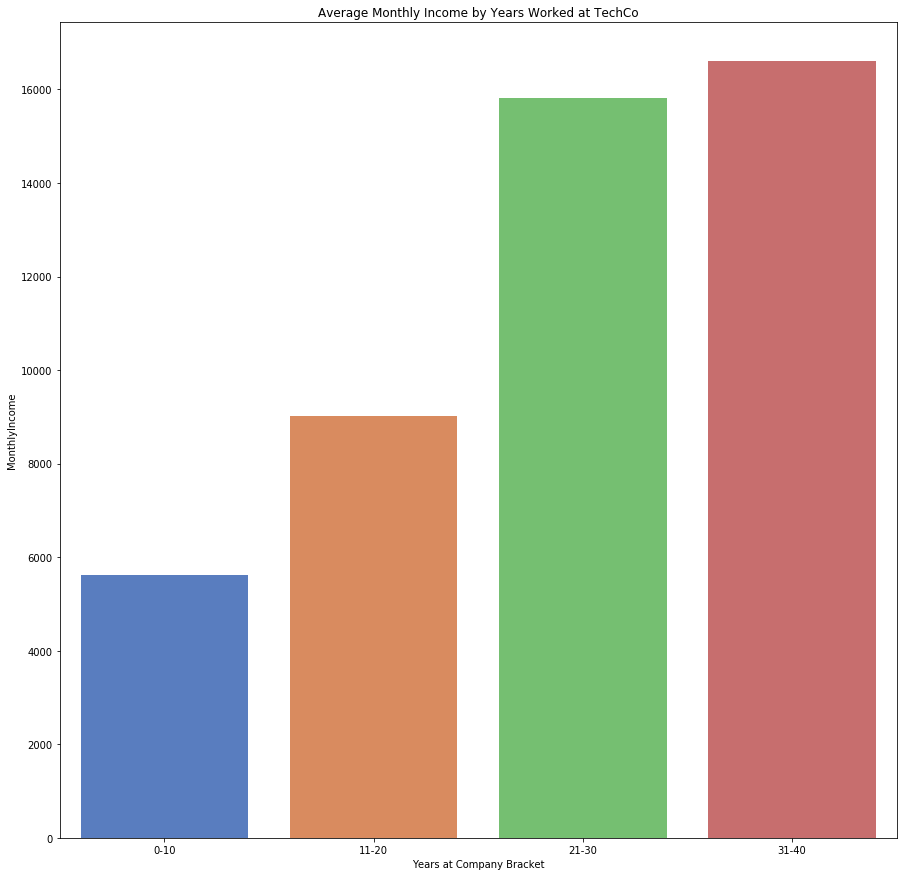

In [260]:
# Trying to get a binned distribution in of Age by MonthlyIncome in Seaborn
plt.figure(figsize=(15,15))
bins=[0, 10, 20, 30, 40]
out = df.groupby(pd.cut(df['YearsAtCompany'], bins=bins, include_lowest=True)).aggregate(np.mean)
out[['YearsAtCompany']] = out[['YearsAtCompany']].applymap(str)
out['Years at Company Bracket'] = ['0-10', '11-20', '21-30', '31-40']

# Fixed X-axis labels currently looking awful!
plt.title('Average Monthly Income by Years Worked at TechCo')
sns.barplot('Years at Company Bracket', 'MonthlyIncome', data=out, palette="muted")
out.head()

<Figure size 1080x1080 with 0 Axes>

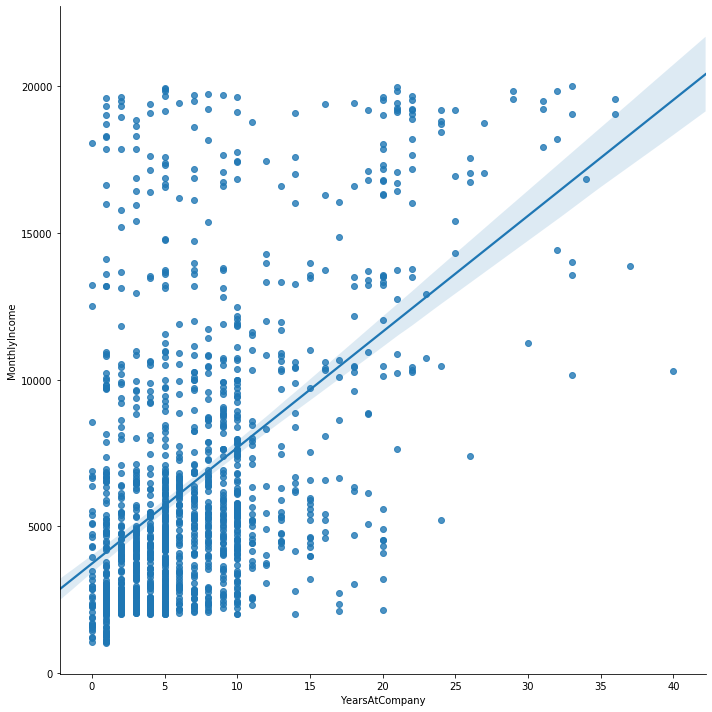

In [261]:
plt.figure(figsize=(15,15))
sns.lmplot("YearsAtCompany", "MonthlyIncome", data=df, size=10) 

We can see that there's plenty of employees at IBM earning over 10K a month regardless of how long they've been at the company. But after the 10 year mark there's an attrition of lower paid employees raising the average through the age brackets

# MODELS!

# Predicting attrition at IBM

Lets extract some feature importances then see where a PCA leads us.

In [262]:
df["Attrition"].value_counts() # Large class imbalance

No     1233
Yes     237
Name: Attrition, dtype: int64

# Label Encoding

In [263]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [264]:
'''LabelEnconding the Categorical Data'''
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])

In [265]:
'''LabelEnconding the Categorical Data'''
df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel'])

In [266]:
'''LabelEnconding the Categorical Data'''
df['Department'] = LabelEncoder().fit_transform(df['Department'])

In [267]:
'''LabelEnconding the Categorical Data'''
df['EducationField'] = LabelEncoder().fit_transform(df['EducationField'])

In [268]:
'''LabelEnconding the Categorical Data'''
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [269]:
'''LabelEnconding the Categorical Data'''
df['JobRole'] = LabelEncoder().fit_transform(df['JobRole'])

In [270]:
'''LabelEnconding the Categorical Data'''
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])

In [271]:
'''LabelEnconding the Categorical Data'''
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

In [272]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [273]:
df['BusinessTravel'].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

In [274]:
df['Department'].value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

In [275]:
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [276]:
df['MaritalStatus'].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [277]:
df['JobRole'].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

In [278]:
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
'''Learning Features and Predicting Features'''
x_train = df.drop(['Attrition'], axis = 1)
y_train = df['Attrition']

In [281]:
'''Train Test Split , 70:30 Ratio'''
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [283]:
x_train.shape

(1176, 30)

In [284]:
x_test.shape

(294, 30)

In [285]:
y_train.shape

(1176,)

In [286]:
y_test.shape

(294,)

# Applying Standardiztion Technique to get optimized results through Standard Scale

In [287]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Selection

The target variable in the given dataset is being converted into classifications hence the problem

becomes classification problem.

Therefore the machine learning algorithms of classification can be applied here in for training and

testing of data.

We will check for the best model one by one

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [289]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [290]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.8843537414965986
[[244  11]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294


 
0.7959183673469388
[[211  44]
 [ 16  23]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       255
           1       0.34      0.59      0.43        39

    accuracy                           0.80       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.85      0.80      0.82       294


 
0.8945578231292517
[[255   0]
 [ 31   8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       1.00      0.21      0.34        39

    accuracy                           0.89       

In [291]:
from sklearn.neighbors import KNeighborsClassifier as knn

# Checking Consistency on KNN Model using Cross Validation

In [292]:
score=cross_val_score(knn(n_neighbors=18,),X=x_train, y=y_train,cv=10)

In [293]:
score

array([0.83050847, 0.83050847, 0.83050847, 0.83898305, 0.83050847,
       0.83898305, 0.83898305, 0.8220339 , 0.84482759, 0.8362069 ])

In [294]:
score.mean()*100,score.std()*100

(83.42051431911163, 0.6230001238566895)

In [295]:
clf=knn(n_neighbors=18)
clf.fit(x_train,y_train)
score1=clf.score(x_train,y_train)
score=clf.score(x_test,y_test)
score1,score

(0.8375850340136054, 0.8707482993197279)

the KNN Model above is giving optimal result after cross validation as-

training set== 83.75% test set=======87%

# 'Best Model SVC in our case'

# Improving the results of SVC (GridSearch,Avoiding Overfitting)

In [318]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=65)

In [319]:
'''Creating Object of SVM'''
from sklearn import svm

svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [320]:
result_acc

0.8413597733711048

In [321]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [322]:
print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       1.00      0.21      0.34        39

    accuracy                           0.89       294
   macro avg       0.95      0.60      0.64       294
weighted avg       0.91      0.89      0.86       294



In [323]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [324]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

# Finding best Parameters for SVC MODEL

In [325]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [326]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = .1, gamma =  .1, kernel= 'linear')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       255
           1       0.81      0.33      0.47        39

    accuracy                           0.90       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.89      0.90      0.88       294



SVM model is giving the best result approx 90%

# Storing the predicted results in csv file

In [327]:
pred_svc2 = pd.DataFrame(pred_svc2, columns=['y_pred']).to_csv('HR-Analytics.csv')

# Saving the best Model as a pickle in a file

I have selected SVM Model as best model as it is giving me best accuracy score after performing overfitting and underfitting

In [328]:
from sklearn.externals import joblib

In [330]:
joblib.dump(svc2,'HR-Analytics.pkl')

['HR-Analytics.pkl']